In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from wordcloud import WordCloud

from country.country import Country
from country.util_country import UtilCountry
from minimum_qualifications.minimum_qualifications import MinimunQualification
from minimum_qualifications.minimum_qualifications import UtilMinimumQualification
from skills.skill import Skill
from skills.util_skill import UtilSkill

py.init_notebook_mode(connected=True)

In [2]:
jobs_google = pd.read_excel("job_skills.xlsx", sheet_name='job_skills')
jobs_google.dropna(axis=0, how='any', inplace=True)

# Q1 - Quais são os países com mais vagas anunciadas pela Google?

# Q2 - Qual o número de vagas oferecidas para o Brasil?

In [3]:
country = Country(jobs_google)
util_country = UtilCountry()

vacancies_by_country = country.count_vacancies_by_country()
data, layout = util_country.maker_data_graph(vacancies_by_country)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Q3 - Quais são as qualificações mínimas e desejáveis que o Google mais exige?

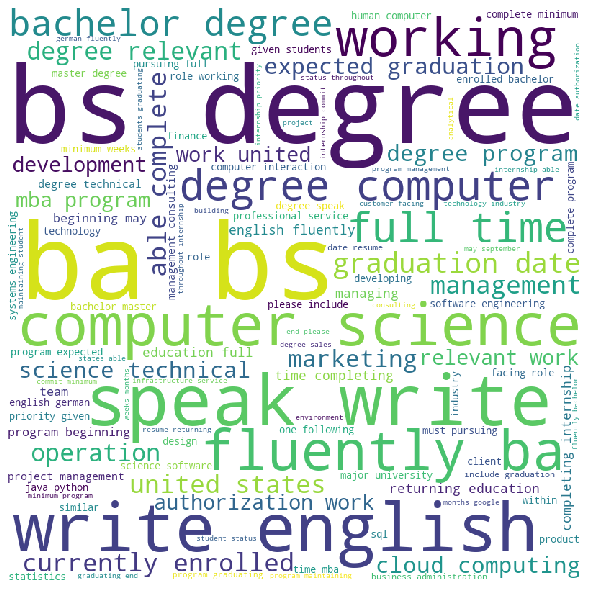

In [4]:
minimum_qualifications = MinimunQualification(jobs_google)
util_minimum_qualification = UtilMinimumQualification()

top_minimum_qualifications = minimum_qualifications.minimum_qualifications_identifier()

text_minimum_qualifications = util_minimum_qualification.maker_data_graph(top_minimum_qualifications)

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text_minimum_qualifications)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Q4 - Quais skills de programação são mais pedidas nas vagas do Google?Falta apenas Gráfico

In [5]:
skill = Skill(jobs_google)
util_skill = UtilSkill()

skills_ti = skill.skill_identifier()

skills, values = util_skill.maker_data_graph_bar(skills_ti)

trace1 = go.Bar(x=skills,
                y=values)
data = [trace1]
py.iplot(data)


# Q5 - Se você tivesse um amigo que sonha se candidatar a uma vaga no Google, que habilidades e skills você falaria para ele se desenvolver e que dicas você daria para ele?

Analisando as qualificações mínimas que o Google pede em suas vagas e as principais skill de programação diria para que ele:

- **Curso de graduação na área**. Diferente de muitos profissionais que dizem: “Para trabalhar com tecnologia não precisa de uma formação”, o Google deixa muito claro na maioria das suas vagas que o candidato tenha sim uma formação acadêmica como qualificação mínima para os cargos

- Aprender **escrever e falar em inglês**

- Foque seus estudos nas linguagens: **Javascript**, **Python**, **Java** e **C++**  

- Saiba trabalhar com **CSS** 

- Ter **experiência prática** na área. 

- Tenha conhecimento de **IHC (Interação Humano-Computador)**

- Além habilidades técnicas é importante desenvolver habilidades de **Comunicação**

# Q6 - Se você quisesse montar um sistema de recomendação para a Google achar candidatos, que outras informações além dessas você adicionaria no dataset para melhorar o match com os candidatos?